In [1]:
!pip install mediapipe



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppresses TensorFlow INFO, WARNING, ERROR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mediapipe as mp
import cv2
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


In [3]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)

In [4]:
data = []
labels = []

DATA_DIR = r"C:\Users\tyagi\Desktop\AIML"





for label in os.listdir(DATA_DIR):
    folder_path = os.path.join(DATA_DIR, label)
    if not os.path.isdir(folder_path):
        continue  # skip files like aiml.ipynb

    for img_file in tqdm(os.listdir(folder_path), desc=f"Processing {label}"):
        img_path = os.path.join(folder_path, img_file)
        image = cv2.imread(img_path)
        if image is None:
            continue  # skip unreadable/corrupt files

        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(image_rgb)

        if results.multi_hand_landmarks:
            landmark_list = []
            for lm in results.multi_hand_landmarks[0].landmark:
                landmark_list.extend([lm.x, lm.y, lm.z])
            data.append(landmark_list)
            labels.append(label)


Processing asl_alphabet_test: 100%|██████████| 28/28 [00:00<00:00, 28.00it/s]


In [5]:
X = np.array(data)
y = np.array(labels)

In [6]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [7]:
X.shape

(14, 63)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



c:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


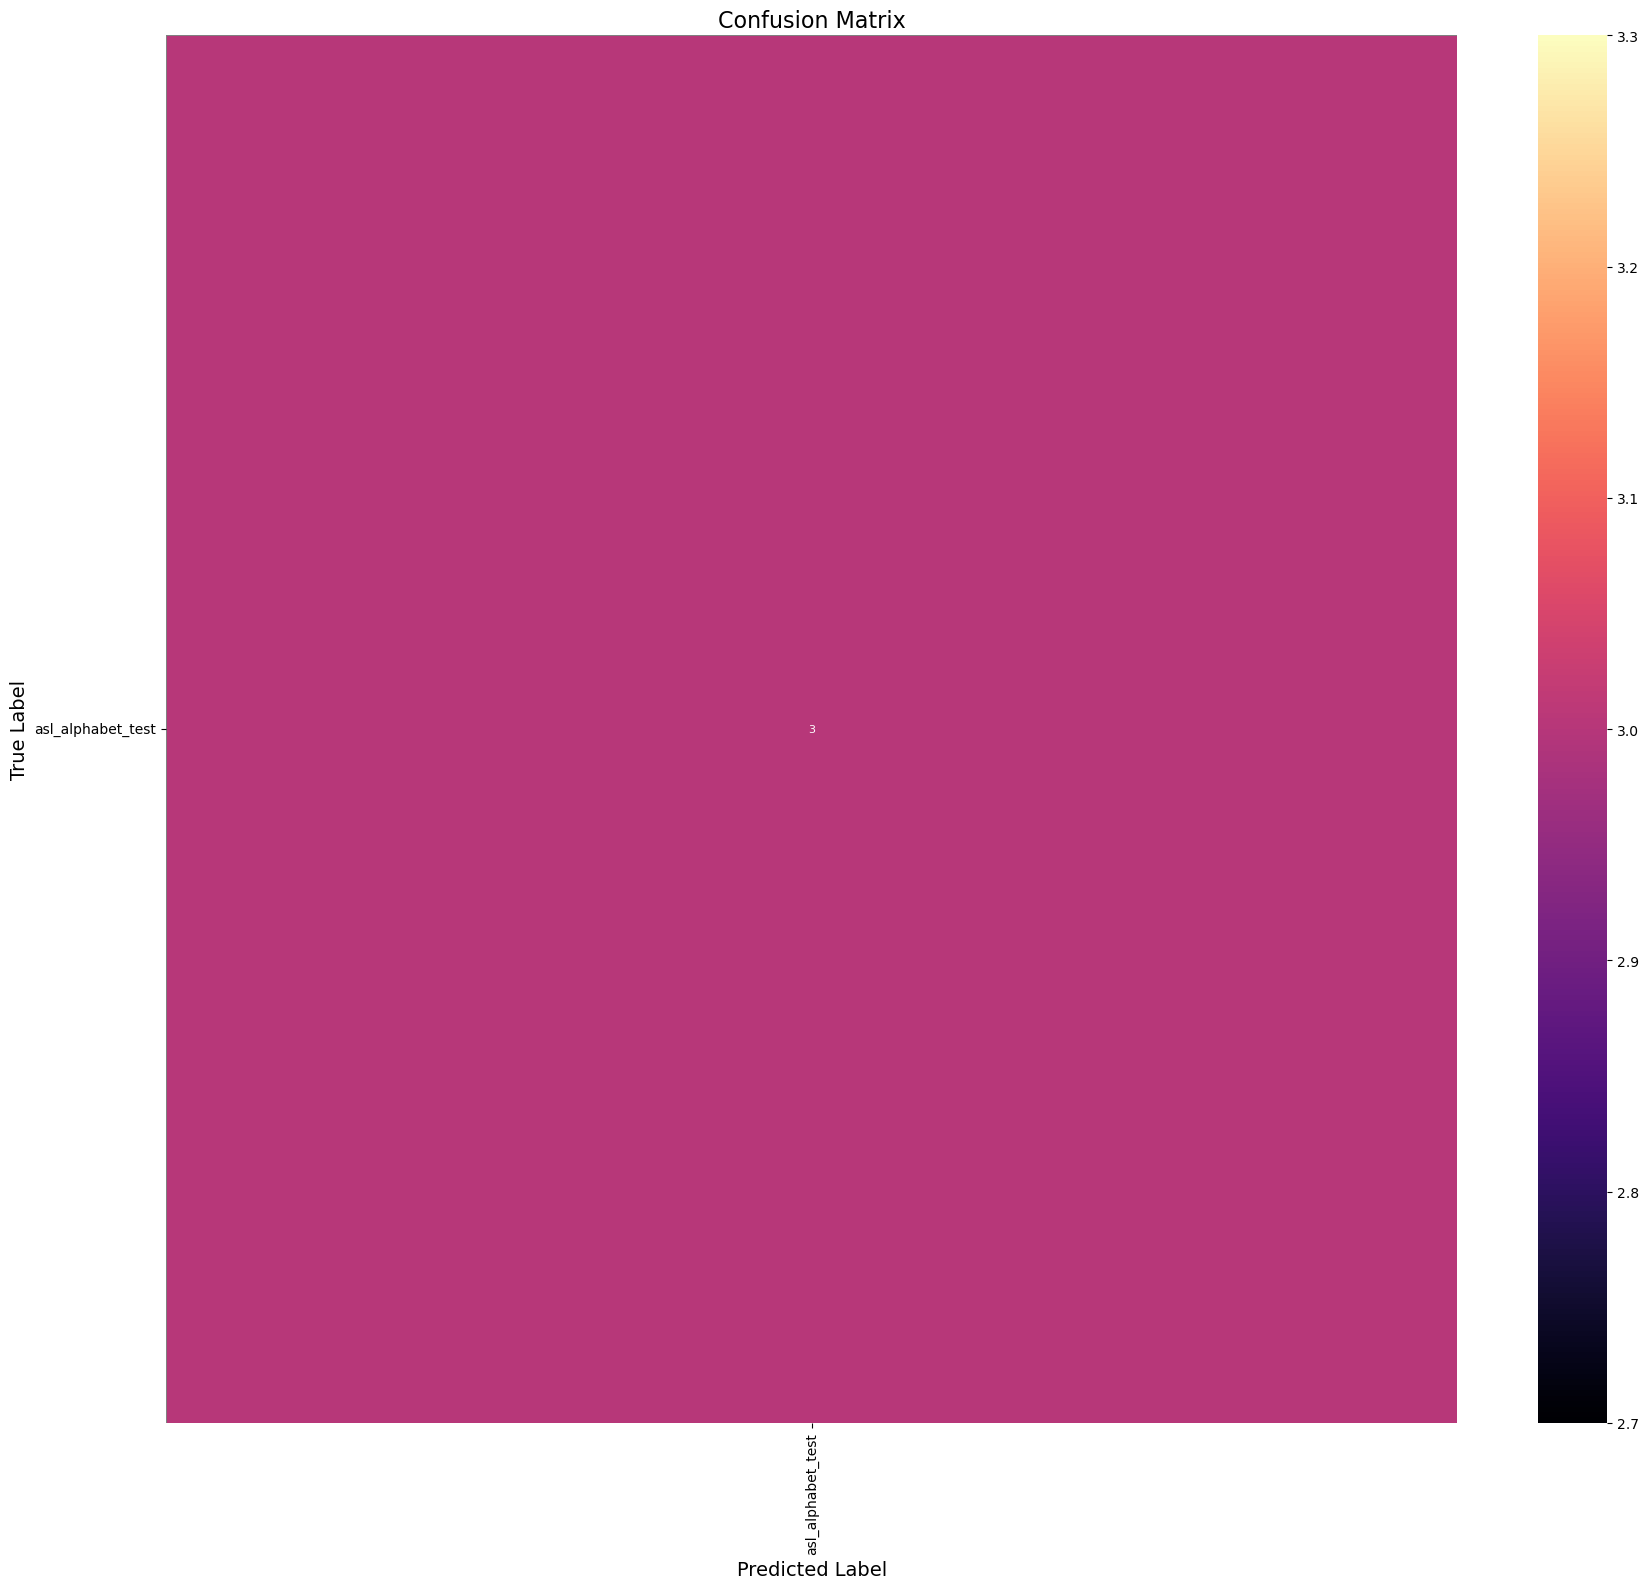

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Ensure y_pred contains predicted class indices
# If you have probabilities (from model.predict), use this:
# y_pred = np.argmax(model.predict(X_test), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get readable class names from LabelEncoder
labels = le.classes_

# Plotting
plt.figure(figsize=(18, 16))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='magma',
            linewidths=0.5,
            linecolor='gray',
            xticklabels=labels,
            yticklabels=labels,
            annot_kws={"size": 8})

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)

plt.tight_layout()
plt.show()


In [12]:
import joblib

joblib.dump(model, r"C:\Users\tyagi\Desktop\model.joblib")
joblib.dump(le, r"C:\Users\tyagi\Desktop\label_encoder.joblib")



['C:\\Users\\tyagi\\Desktop\\label_encoder.joblib']